# Importing Libraries

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Preprocessing

**1. Loading the Data**

In [ ]:
dataset_train=pd.read_csv('sign_mnist_train.csv')
dataset_test=pd.read_csv('sign_mnist_test.csv')

**2. Splitting in X and Y**

In [ ]:
X_train= dataset_train.drop(columns=['label']).values
y_train = dataset_train['label'].values
X_test= dataset_test.drop(columns=['label']).values
y_test = dataset_test['label'].values

**3. Reshaping X for CNN and normalizing it**

In [ ]:
X_train= X_train.reshape(-1, 28, 28, 1)
X_train = X_train/ 255.0

X_test= X_test.reshape(-1, 28, 28, 1)
X_test = X_test/ 255.0

# Initializing CNN



In [ ]:
cnn=tf.keras.models.Sequential()

**STEP-1 Convolution**

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=2,activation='relu',input_shape=[28,28,1]))

**STEP-2 Pooling**

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

**Adding another layer**

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=2,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

**STEP-3 Flattening**

In [ ]:
cnn.add(tf.keras.layers.Flatten())

**STEP-4 Full Connection**

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

**STEP-5 Dropout Layer**

In [ ]:
cnn.add(tf.keras.layers.Dropout(rate=0.2))

**STEP-6 Output Layer**

In [ ]:
cnn.add(tf.keras.layers.Dense(units=26,activation='softmax'))

# Training the CNN

**1. Compiling the CNN**

In [ ]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**2. Training the CNN on traing set and evaluating it in the Test Set**

In [ ]:
history=cnn.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
858/858 [==============================] - 21s 23ms/step - loss: 1.3204 - accuracy: 0.5937 - val_loss: 0.6123 - val_accuracy: 0.8113
Epoch 2/10
858/858 [==============================] - 19s 22ms/step - loss: 0.3065 - accuracy: 0.9000 - val_loss: 0.4194 - val_accuracy: 0.8561
Epoch 3/10
858/858 [==============================] - 18s 21ms/step - loss: 0.1341 - accuracy: 0.9588 - val_loss: 0.3845 - val_accuracy: 0.8797
Epoch 4/10
858/858 [==============================] - 22s 26ms/step - loss: 0.0721 - accuracy: 0.9794 - val_loss: 0.3723 - val_accuracy: 0.8773
Epoch 5/10
858/858 [==============================] - 18s 21ms/step - loss: 0.0497 - accuracy: 0.9856 - val_loss: 0.4328 - val_accuracy: 0.8859
Epoch 6/10
858/858 [==============================] - 18s 21ms/step - loss: 0.0385 - accuracy: 0.9880 - val_loss: 0.3411 - val_accuracy: 0.8865
Epoch 7/10
858/858 [==============================] - 20s 23ms/step - loss: 0.0321 - accuracy: 0.9898 - val_loss: 0.4858 - val_accuracy:

# Plotting Graphs of Accuracy and loss for Analysis

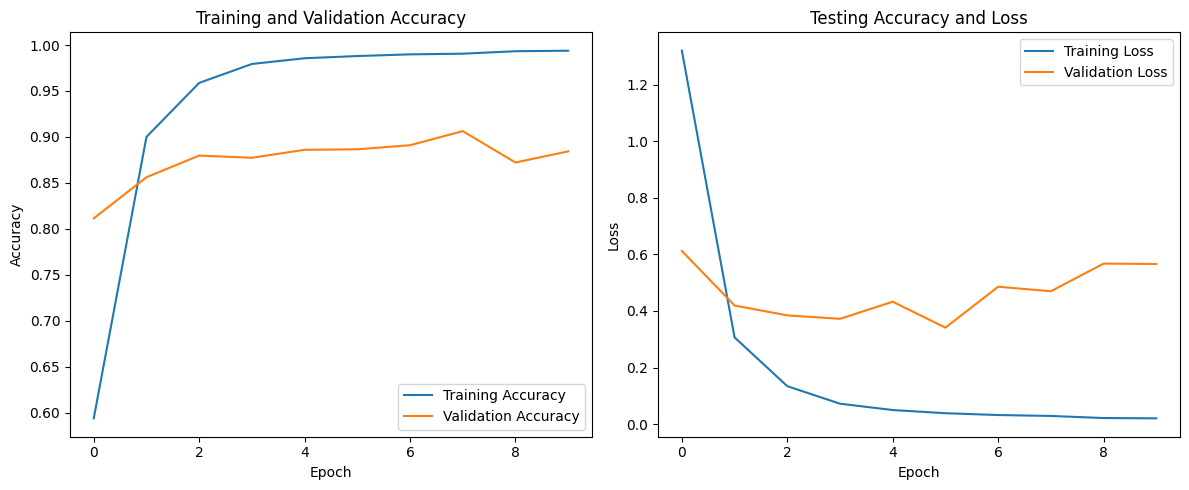

In [ ]:
# Plot training history
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Testing Accuracy and Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Model Visualization

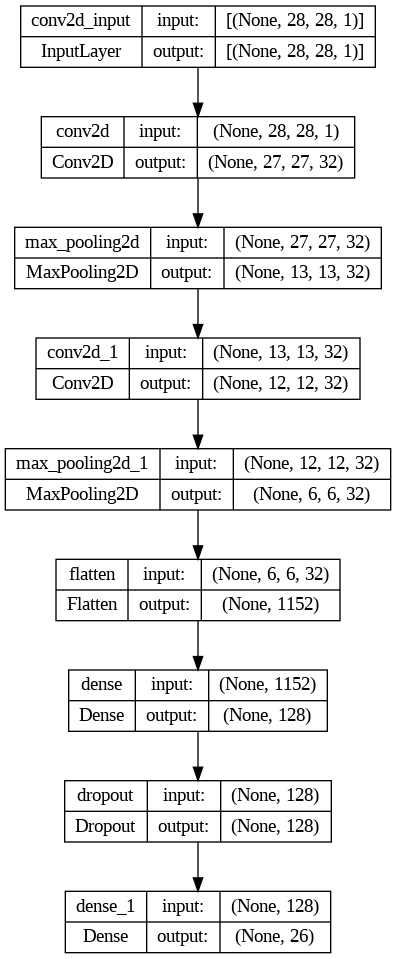

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(cnn, to_file='model.png', show_shapes=True, show_layer_names=True)
Image('model.png')


# Anding new dropout layer with rate 0.3 and accessing the results

In [ ]:
cnn1=tf.keras.models.Sequential()
cnn1.add(tf.keras.layers.Conv2D(filters=32,kernel_size=2,activation='relu',input_shape=[28,28,1]))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn1.add(tf.keras.layers.Conv2D(filters=32,kernel_size=2,activation='relu'))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn1.add(tf.keras.layers.Flatten())
cnn1.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn1.add(tf.keras.layers.Dropout(rate=0.2))
cnn1.add(tf.keras.layers.Dropout(rate=0.3))
cnn1.add(tf.keras.layers.Dense(units=26,activation='softmax'))
cnn1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=cnn1.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
858/858 [==============================] - 29s 33ms/step - loss: 1.5463 - accuracy: 0.5202 - val_loss: 0.6638 - val_accuracy: 0.7945
Epoch 2/10
858/858 [==============================] - 22s 26ms/step - loss: 0.4733 - accuracy: 0.8416 - val_loss: 0.4954 - val_accuracy: 0.8479
Epoch 3/10
858/858 [==============================] - 20s 23ms/step - loss: 0.2578 - accuracy: 0.9114 - val_loss: 0.3999 - val_accuracy: 0.8752
Epoch 4/10
858/858 [==============================] - 21s 25ms/step - loss: 0.1789 - accuracy: 0.9392 - val_loss: 0.3591 - val_accuracy: 0.9002
Epoch 5/10
858/858 [==============================] - 18s 21ms/step - loss: 0.1237 - accuracy: 0.9578 - val_loss: 0.3955 - val_accuracy: 0.9017
Epoch 6/10
858/858 [==============================] - 18s 21ms/step - loss: 0.1010 - accuracy: 0.9651 - val_loss: 0.3960 - val_accuracy: 0.9115
Epoch 7/10
858/858 [==============================] - 20s 23ms/step - loss: 0.0889 - accuracy: 0.9687 - val_loss: 0.5580 - val_accuracy:

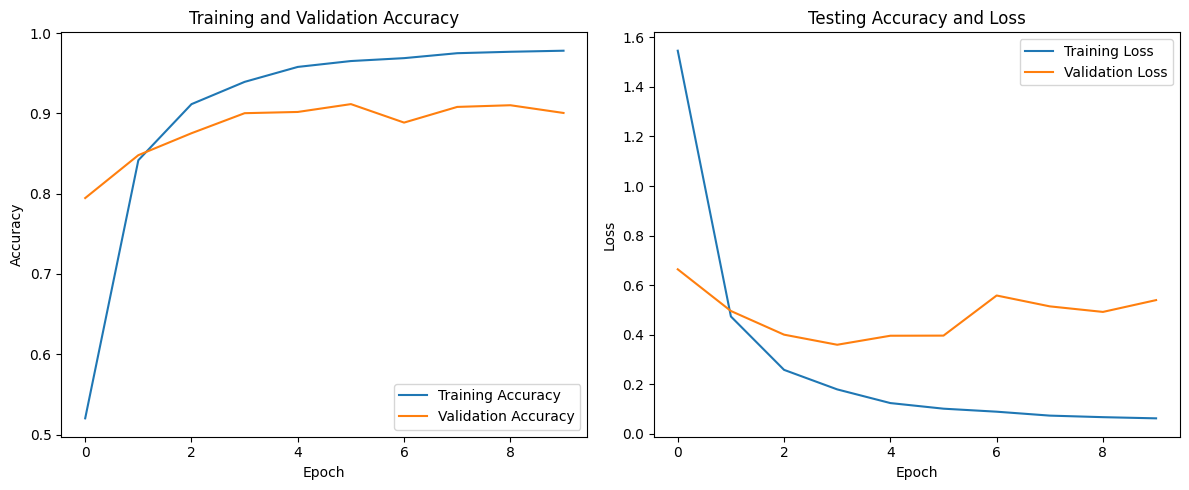

In [ ]:
# Plot training history
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Testing Accuracy and Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Model Visualization

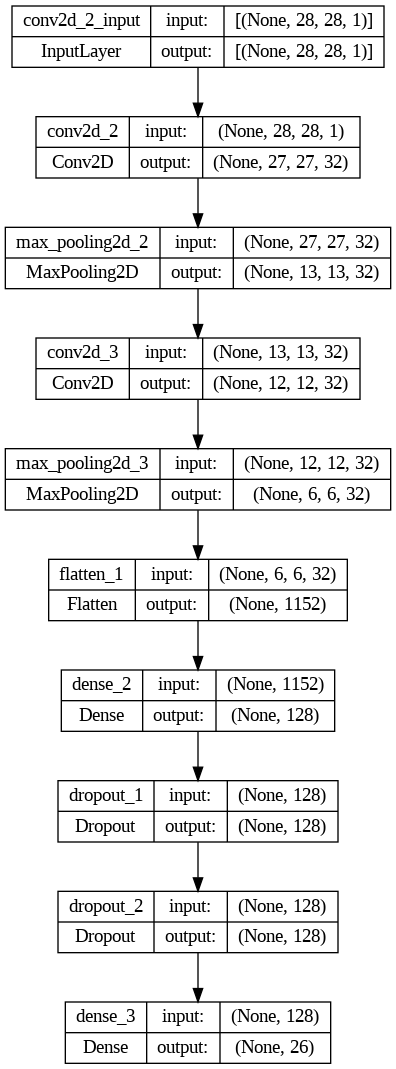

In [ ]:
plot_model(cnn1, to_file='model.png', show_shapes=True, show_layer_names=True)
Image('model.png')